# READING OF  CSV FILE

In [333]:
import pandas as pd

In [334]:
data = pd.read_csv('C://Users//mdbab//OneDrive//Desktop//DATA SCIENCE MATERIAL//DATA//Comic.csv')

In [335]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


# CHECKING OF DUPLICATED DATA

In [337]:
data.duplicated().sum()

0

# CHECKING OF NULL VALUES

In [338]:
data.isnull().sum()/len(data)*100

page_id              0.000000
name                 0.000000
urlslug              0.000000
ID                  29.190835
ALIGN                8.715197
EYE                 52.610209
HAIR                32.975638
SEX                  1.812645
GSM                 99.071926
ALIVE                0.043503
APPEARANCES          5.147912
FIRST APPEARANCE     1.000580
YEAR                 1.000580
dtype: float64

## DROPOING OF LESS IMFORMATIVE  COLUMNS

In [339]:
data = data.drop(columns=['GSM','page_id','FIRST APPEARANCE','YEAR'])

## OUTLIERS

In [340]:
import seaborn as sns

<Axes: >

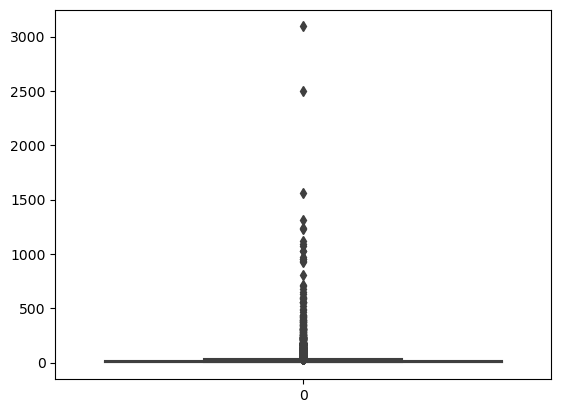

In [341]:
sns.boxplot(data['APPEARANCES']) # checking outliers visually

In [342]:
data.describe()

,APPEARANCES
count,6541.000000
mean,23.625134
std,87.378509
min,1.000000
25%,2.000000
50%,6.000000
75%,15.000000
max,3093.000000


In [343]:
# FINDING LOWER AND UPPER RANGE THROUGH IQR METHOD
Q1 = 2.000000
Q3 = 15.000000
IQR = Q3-Q1
m1 = Q1-1.5*IQR
m2 = Q3+1.5*IQR
print("Lower range : ",m1)
print("Upper range : ",m2)

Lower range :  -17.5
Upper range :  34.5


In [344]:
# CAPPING OF OUTLIERS
data['APPEARANCES'] = data['APPEARANCES'].clip(lower=m1,upper=m2)

<Axes: >

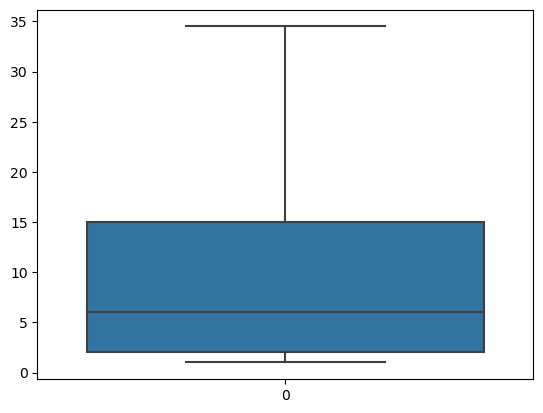

In [345]:
sns.boxplot(data['APPEARANCES'])

## IMPUTATIOIN OF CATOGORICAL COLUMNS

In [346]:
from feature_engine.imputation import CategoricalImputer

In [347]:
imputer = CategoricalImputer(imputation_method='missing',variables=['ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE'])

In [348]:
imputer.fit(data)

CategoricalImputer(variables=['ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE'])

In [349]:
data = imputer.transform(data)

## IMPUTATIOIN OF NUMERICAL COLUMNS

In [350]:
from feature_engine.imputation import MeanMedianImputer

In [351]:
M_Imputer = MeanMedianImputer(imputation_method='mean',variables=['APPEARANCES'])

In [352]:
M_Imputer.fit(data)

MeanMedianImputer(imputation_method='mean', variables=['APPEARANCES'])

In [353]:
data = M_Imputer.transform(data)

## CHECKING NULL VALUES AFTER IMPUTATION

In [354]:
data.isnull().sum()/len(data)*100

name           0.0
urlslug        0.0
ID             0.0
ALIGN          0.0
EYE            0.0
HAIR           0.0
SEX            0.0
ALIVE          0.0
APPEARANCES    0.0
dtype: float64

In [355]:
data.head()

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,34.5
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,34.5
2,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,34.5
3,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,34.5
4,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,34.5


In [356]:
data.shape

(6896, 9)

## ENCODING USING LABLE ENCODER 

In [357]:
from sklearn.preprocessing import LabelEncoder

In [358]:
encoder = LabelEncoder()

In [359]:
col = ['name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE']

In [360]:
for i in col:
    data[i] = encoder.fit_transform(data[i])

In [361]:
data = pd.DataFrame(data)

In [362]:
data.head()

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES
0,597,597,3,1,3,0,2,1,34.5
1,6007,6006,3,1,3,0,2,1,34.5
2,2487,2487,3,1,4,3,2,1,34.5
3,3002,3003,2,1,4,17,2,1,34.5
4,5280,5279,3,1,3,0,2,1,34.5


In [363]:
# DROPING OF URLSLUG AS DUPLICATED COLUMN OF NAME
data =data.drop(columns=['urlslug'])

## SEPARATING OUTPUT AND INPUT COLUMNS

In [364]:
OUTPUT = data['ALIGN']
INPUT = data.drop(columns=['ALIGN'])

## FEATURE SCALING THROUGH MinMaxScaler

In [365]:
from sklearn.preprocessing import MinMaxScaler

In [366]:
scaler = MinMaxScaler()

In [367]:
INPUT = scaler.fit_transform(INPUT)

In [368]:
INPUT = pd.DataFrame(INPUT)

In [369]:
INPUT.columns= ['name', 'ID','EYE', 'HAIR', 'SEX', 'ALIVE','APPEARANCES']

In [370]:
INPUT.head()

,name,ID,EYE,HAIR,SEX,ALIVE,APPEARANCES
0,0.086584,1.000000,0.176471,0.000000,0.5,0.5,1.0
1,0.871211,1.000000,0.176471,0.000000,0.5,0.5,1.0
2,0.360696,1.000000,0.235294,0.176471,0.5,0.5,1.0
3,0.435388,0.666667,0.235294,1.000000,0.5,0.5,1.0
4,0.765772,1.000000,0.176471,0.000000,0.5,0.5,1.0


## SPLITING DATA INTO TRAIN TEST

In [371]:
from sklearn.model_selection import  train_test_split

In [372]:
XTRAIN,xtest,YTRAIN,ytest = train_test_split(INPUT,OUTPUT,test_size = 0.25, random_state = 32)

# BUILDING ML MODELS

## LOGISTIC REGRESSION

In [373]:
from sklearn.linear_model import LogisticRegression
L_r = LogisticRegression()

In [374]:
L_r = LogisticRegression()

In [375]:
L_r.fit(XTRAIN,YTRAIN)

LogisticRegression()

In [376]:
Y_PRED_TRAIN = L_r.predict(XTRAIN)
Y_PREDC_TEST = L_r.predict(xtest)

In [377]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [378]:
TRAIN_ACCURACY_SCORE = accuracy_score(Y_PRED_TRAIN,YTRAIN)
TEST_ACCURACY_SCORE = accuracy_score(Y_PREDC_TEST,ytest)
TRAIN_PRECISION_SCORE = precision_score(Y_PRED_TRAIN,YTRAIN,average='weighted')
TEST_PRECISION_SCORE = precision_score(Y_PREDC_TEST,ytest,average='weighted')
TRAIN_RECALL_SCORE = recall_score(Y_PRED_TRAIN,YTRAIN,average='weighted')
TEST_RECALL_SCORE = recall_score(Y_PREDC_TEST,ytest,average='weighted')
TRAIN_CONFUSION_MATRIX = confusion_matrix(Y_PRED_TRAIN,YTRAIN)
TEST_CONFUSION_MATRIX = confusion_matrix(Y_PREDC_TEST,ytest)

print('TRAIN_ACCURACY_SCORE :',TRAIN_ACCURACY_SCORE)
print('TEST_ACCURACY_SCORE :',TEST_ACCURACY_SCORE)
print('TRAIN_PRECISION_SCORE :',TRAIN_PRECISION_SCORE)
print('TEST_PRECISION_SCORE :',TEST_PRECISION_SCORE)
print('TRAIN_RECALL_SCORE :',TRAIN_RECALL_SCORE)
print('TEST_RECALL_SCORE :',TEST_RECALL_SCORE)
print('TRAIN_CONFUSION_MATRIX :',TRAIN_CONFUSION_MATRIX)
print('TEST_CONFUSION_MATRIX : ',TEST_CONFUSION_MATRIX)

TRAIN_ACCURACY_SCORE : 0.5251353441608662
TEST_ACCURACY_SCORE : 0.5284222737819025
TRAIN_PRECISION_SCORE : 0.6393146730214497
TEST_PRECISION_SCORE : 0.6416061995082082
TRAIN_RECALL_SCORE : 0.5251353441608662
TEST_RECALL_SCORE : 0.5284222737819025
TRAIN_CONFUSION_MATRIX : [[1511  919  214  185    1]
 [ 651 1205  233  251    2]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]
TEST_CONFUSION_MATRIX :  [[519 316  79  68]
 [214 392  75  61]
 [  0   0   0   0]
 [  0   0   0   0]]


C:\Users\mdbab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mdbab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##  RANDOM FOREST

In [379]:
from sklearn.ensemble import RandomForestClassifier

In [380]:
rf = RandomForestClassifier(criterion='gini',n_estimators =100,max_depth=12,min_samples_split=3)

In [381]:
rf.fit(XTRAIN,YTRAIN)

RandomForestClassifier(max_depth=12, min_samples_split=3)

In [382]:
Y_PRED_TRAIN = rf.predict(XTRAIN)
Y_PREDC_TEST = rf.predict(xtest)

In [383]:
TRAIN_ACCURACY_SCORE = accuracy_score(Y_PRED_TRAIN,YTRAIN)
TEST_ACCURACY_SCORE = accuracy_score(Y_PREDC_TEST,ytest)
TRAIN_PRECISION_SCORE = precision_score(Y_PRED_TRAIN,YTRAIN,average='weighted')
TEST_PRECISION_SCORE = precision_score(Y_PREDC_TEST,ytest,average='weighted')
TRAIN_RECALL_SCORE = recall_score(Y_PRED_TRAIN,YTRAIN,average='weighted')
TEST_RECALL_SCORE = recall_score(Y_PREDC_TEST,ytest,average='weighted')
TRAIN_CONFUSION_MATRIX = confusion_matrix(Y_PRED_TRAIN,YTRAIN)
TEST_CONFUSION_MATRIX = confusion_matrix(Y_PREDC_TEST,ytest)

print('TRAIN_ACCURACY_SCORE :',TRAIN_ACCURACY_SCORE)
print('TEST_ACCURACY_SCORE :',TEST_ACCURACY_SCORE)
print('TRAIN_PRECISION_SCORE :',TRAIN_PRECISION_SCORE)
print('TEST_PRECISION_SCORE :',TEST_PRECISION_SCORE)
print('TRAIN_RECALL_SCORE :',TRAIN_RECALL_SCORE)
print('TEST_RECALL_SCORE :',TEST_RECALL_SCORE)
print('TRAIN_CONFUSION_MATRIX :',TRAIN_CONFUSION_MATRIX)
print('TEST_CONFUSION_MATRIX : ',TEST_CONFUSION_MATRIX)

TRAIN_ACCURACY_SCORE : 0.7735885537509667
TEST_ACCURACY_SCORE : 0.5504640371229699
TRAIN_PRECISION_SCORE : 0.8510833226968306
TEST_PRECISION_SCORE : 0.6530493584230143
TRAIN_RECALL_SCORE : 0.7735885537509667
TEST_RECALL_SCORE : 0.5504640371229699
TRAIN_CONFUSION_MATRIX : [[1957  316  169  127    1]
 [ 205 1807  168  182    2]
 [   0    1  110    0    0]
 [   0    0    0  127    0]
 [   0    0    0    0    0]]
TEST_CONFUSION_MATRIX :  [[503 262  75  59]
 [229 442  76  68]
 [  0   2   2   0]
 [  1   2   1   2]]


C:\Users\mdbab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## XGBOOST CLASSIFIER 

In [384]:
import xgboost

In [385]:
from xgboost import XGBClassifier

In [386]:
XGBC = XGBClassifier(n_estimators= 100,max_depth =10,learning_rate =0.1)

In [387]:
XGBC.fit(XTRAIN,YTRAIN)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [388]:
Y_PRED_TRAIN = XGBC.predict(XTRAIN)
Y_PREDC_TEST = XGBC.predict(xtest)

In [389]:
TRAIN_ACCURACY_SCORE = accuracy_score(Y_PRED_TRAIN,YTRAIN)
TEST_ACCURACY_SCORE = accuracy_score(Y_PREDC_TEST,ytest)
TRAIN_PRECISION_SCORE = precision_score(Y_PRED_TRAIN,YTRAIN,average='weighted')
TEST_PRECISION_SCORE = precision_score(Y_PREDC_TEST,ytest,average='weighted')
TRAIN_RECALL_SCORE = recall_score(Y_PRED_TRAIN,YTRAIN,average='weighted')
TEST_RECALL_SCORE = recall_score(Y_PREDC_TEST,ytest,average='weighted')
TRAIN_CONFUSION_MATRIX = confusion_matrix(Y_PRED_TRAIN,YTRAIN)
TEST_CONFUSION_MATRIX = confusion_matrix(Y_PREDC_TEST,ytest)

print('TRAIN_ACCURACY_SCORE :',TRAIN_ACCURACY_SCORE)
print('TEST_ACCURACY_SCORE :',TEST_ACCURACY_SCORE)
print('TRAIN_PRECISION_SCORE :',TRAIN_PRECISION_SCORE)
print('TEST_PRECISION_SCORE :',TEST_PRECISION_SCORE)
print('TRAIN_RECALL_SCORE :',TRAIN_RECALL_SCORE)
print('TEST_RECALL_SCORE :',TEST_RECALL_SCORE)
print('TRAIN_CONFUSION_MATRIX :',TRAIN_CONFUSION_MATRIX)
print('TEST_CONFUSION_MATRIX : ',TEST_CONFUSION_MATRIX)

TRAIN_ACCURACY_SCORE : 0.8952049497293116
TEST_ACCURACY_SCORE : 0.525522041763341
TRAIN_PRECISION_SCORE : 0.9061986577804096
TEST_PRECISION_SCORE : 0.5864376506404866
TRAIN_RECALL_SCORE : 0.8952049497293116
TEST_RECALL_SCORE : 0.525522041763341
TRAIN_CONFUSION_MATRIX : [[2062  194   74   47    1]
 [  99 1927   64   56    2]
 [   1    3  308    0    0]
 [   0    0    1  333    0]
 [   0    0    0    0    0]]
TEST_CONFUSION_MATRIX :  [[468 255  58  53]
 [238 418  76  68]
 [ 11  16  16   4]
 [ 16  19   4   4]]


C:\Users\mdbab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## SVC 

In [390]:
from sklearn.svm import SVC

In [391]:
svc = SVC(kernel='rbf', degree = 3, C=1.0 , gamma='scale')

In [392]:
svc.fit(XTRAIN,YTRAIN)

SVC()

In [393]:
Y_PRED_TRAIN = svc.predict(XTRAIN)
Y_PREDC_TEST = svc.predict(xtest)

In [394]:
TRAIN_ACCURACY_SCORE = accuracy_score(Y_PRED_TRAIN,YTRAIN)
TEST_ACCURACY_SCORE = accuracy_score(Y_PREDC_TEST,ytest)
TRAIN_PRECISION_SCORE = precision_score(Y_PRED_TRAIN,YTRAIN,average='weighted')
TEST_PRECISION_SCORE = precision_score(Y_PREDC_TEST,ytest,average='weighted')
TRAIN_RECALL_SCORE = recall_score(Y_PRED_TRAIN,YTRAIN,average='weighted')
TEST_RECALL_SCORE = recall_score(Y_PREDC_TEST,ytest,average='weighted')
TRAIN_CONFUSION_MATRIX = confusion_matrix(Y_PRED_TRAIN,YTRAIN)
TEST_CONFUSION_MATRIX = confusion_matrix(Y_PREDC_TEST,ytest)

print('TRAIN_ACCURACY_SCORE :',TRAIN_ACCURACY_SCORE)
print('TEST_ACCURACY_SCORE :',TEST_ACCURACY_SCORE)
print('TRAIN_PRECISION_SCORE :',TRAIN_PRECISION_SCORE)
print('TEST_PRECISION_SCORE :',TEST_PRECISION_SCORE)
print('TRAIN_RECALL_SCORE :',TRAIN_RECALL_SCORE)
print('TEST_RECALL_SCORE :',TEST_RECALL_SCORE)
print('TRAIN_CONFUSION_MATRIX :',TRAIN_CONFUSION_MATRIX)
print('TEST_CONFUSION_MATRIX : ',TEST_CONFUSION_MATRIX)

TRAIN_ACCURACY_SCORE : 0.5655452436194895
TEST_ACCURACY_SCORE : 0.5510440835266821
TRAIN_PRECISION_SCORE : 0.6825108280697894
TEST_PRECISION_SCORE : 0.6600358315159073
TRAIN_RECALL_SCORE : 0.5655452436194895
TEST_RECALL_SCORE : 0.5510440835266821
TRAIN_CONFUSION_MATRIX : [[1537  736  184  157    0]
 [ 625 1388  263  279    3]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]
TEST_CONFUSION_MATRIX :  [[506 264  68  60]
 [227 444  86  69]
 [  0   0   0   0]
 [  0   0   0   0]]


C:\Users\mdbab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mdbab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
